In [1]:
import pandas as pd 
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/amans/Downloads/Titanic.csv")
data

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [3]:
data.info

<bound method DataFrame.info of      Class  Gender    Age Survived
0      3rd    Male  Child       No
1      3rd    Male  Child       No
2      3rd    Male  Child       No
3      3rd    Male  Child       No
4      3rd    Male  Child       No
...    ...     ...    ...      ...
2196  Crew  Female  Adult      Yes
2197  Crew  Female  Adult      Yes
2198  Crew  Female  Adult      Yes
2199  Crew  Female  Adult      Yes
2200  Crew  Female  Adult      Yes

[2201 rows x 4 columns]>

In [4]:
data['Age'].value_counts()

Age
Adult    2092
Child     109
Name: count, dtype: int64

### Observations:
* All columns are object data type and categorical in nature  
* There are no null values  
* As the columns are categorical, we can adopt one-hot-encoding  


<BarContainer object of 4 artists>

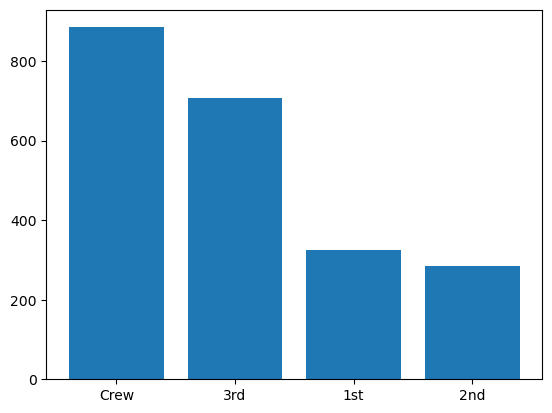

In [5]:
counts = data['Class'].value_counts()
plt.bar(counts.index, counts.values)


<BarContainer object of 2 artists>

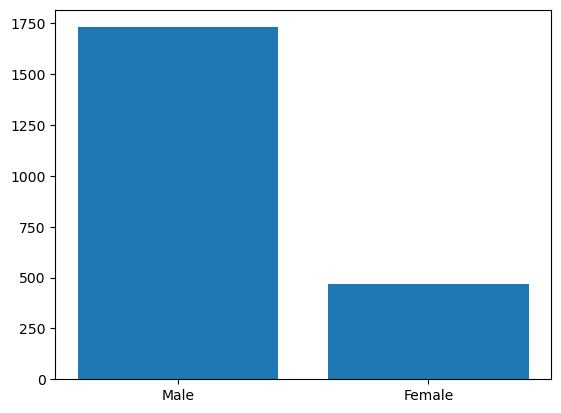

In [6]:
counts = data['Gender'].value_counts()
plt.bar(counts.index, counts.values)


<BarContainer object of 2 artists>

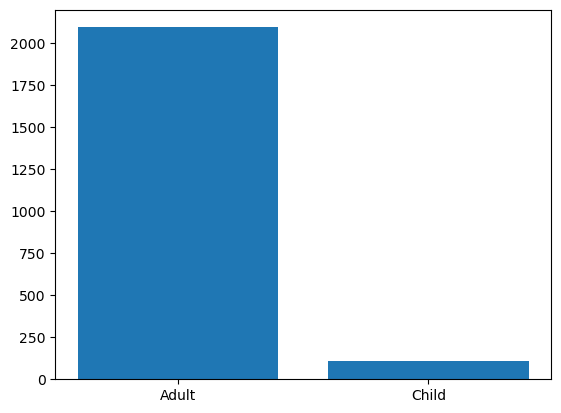

In [7]:
counts = data['Age'].value_counts()
plt.bar(counts.index, counts.values)


In [8]:
df =pd.get_dummies(data,dtype=int)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Class_1st      2201 non-null   int32
 1   Class_2nd      2201 non-null   int32
 2   Class_3rd      2201 non-null   int32
 3   Class_Crew     2201 non-null   int32
 4   Gender_Female  2201 non-null   int32
 5   Gender_Male    2201 non-null   int32
 6   Age_Adult      2201 non-null   int32
 7   Age_Child      2201 non-null   int32
 8   Survived_No    2201 non-null   int32
 9   Survived_Yes   2201 non-null   int32
dtypes: int32(10)
memory usage: 86.1 KB


In [10]:
frequent_itemsets = apriori(df, min_support = 0.5, use_colnames=True, max_len=None)
frequent_itemsets
import warnings
warnings.filterwarnings('ignore')

C:\Users\amans\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [11]:
frequent_itemsets

,support,itemsets
0,0.786461,(Gender_Male)
1,0.950477,(Age_Adult)
2,0.676965,(Survived_No)
3,0.757383,"(Gender_Male, Age_Adult)"
4,0.619718,"(Gender_Male, Survived_No)"
5,0.653339,"(Survived_No, Age_Adult)"
6,0.603816,"(Gender_Male, Survived_No, Age_Adult)"


In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,1.0,0.009870,1.339441,0.061028,0.773191,0.253420,0.879936
1,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,1.0,0.009870,1.051116,0.263149,0.773191,0.048630,0.879936
2,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,1.0,0.087312,1.523634,0.659783,0.734518,0.343674,0.851710
3,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,1.0,0.087312,2.525187,0.436144,0.734518,0.603990,0.851710
4,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,1.0,0.009900,1.419023,0.046906,0.670709,0.295290,0.826241
5,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,1.0,0.009900,1.033317,0.305968,0.670709,0.032243,0.826241
6,"(Gender_Male, Survived_No)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,1.0,0.014788,1.929980,0.064404,0.624824,0.481860,0.804809
7,"(Gender_Male, Age_Adult)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,1.0,0.091095,1.593193,0.621823,0.727024,0.372330,0.844593
8,"(Survived_No, Age_Adult)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,1.0,0.089991,2.817152,0.429921,0.722283,0.645032,0.845982
9,(Gender_Male),"(Survived_No, Age_Adult)",0.786461,0.653339,0.603816,0.767764,1.175139,1.0,0.089991,1.492710,0.697935,0.722283,0.330078,0.845982


In [13]:
rules.sort_values(by='lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
7,"(Gender_Male, Age_Adult)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,1.0,0.091095,1.593193,0.621823,0.727024,0.372330,0.844593
10,(Survived_No),"(Gender_Male, Age_Adult)",0.676965,0.757383,0.603816,0.891946,1.177669,1.0,0.091095,2.245337,0.467023,0.727024,0.554633,0.844593
8,"(Survived_No, Age_Adult)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,1.0,0.089991,2.817152,0.429921,0.722283,0.645032,0.845982
9,(Gender_Male),"(Survived_No, Age_Adult)",0.786461,0.653339,0.603816,0.767764,1.175139,1.0,0.089991,1.492710,0.697935,0.722283,0.330078,0.845982
2,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,1.0,0.087312,1.523634,0.659783,0.734518,0.343674,0.851710
3,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,1.0,0.087312,2.525187,0.436144,0.734518,0.603990,0.851710
6,"(Gender_Male, Survived_No)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,1.0,0.014788,1.929980,0.064404,0.624824,0.481860,0.804809
11,(Age_Adult),"(Gender_Male, Survived_No)",0.950477,0.619718,0.603816,0.635277,1.025106,1.0,0.014788,1.042660,0.494550,0.624824,0.040914,0.804809
4,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,1.0,0.009900,1.419023,0.046906,0.670709,0.295290,0.826241
5,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,1.0,0.009900,1.033317,0.305968,0.670709,0.032243,0.826241


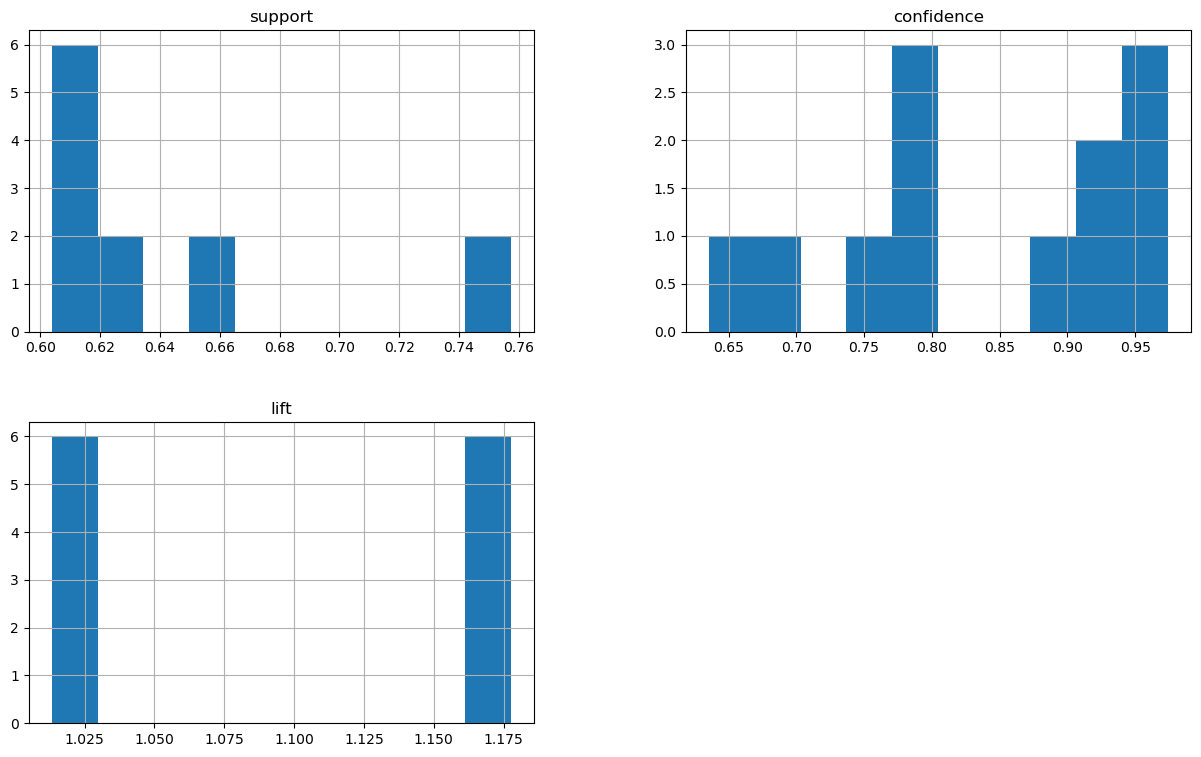

In [14]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,9))
plt.show()

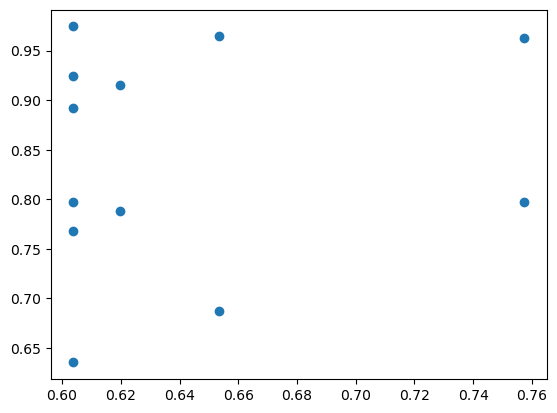

In [15]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

In [17]:
rules[rules["consequents"]== ({"Survived_Yes"})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
